# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observable Trends

1) For the four linear regression chart combinations that we plotted, only temperature and latitude had a strong correlation for both northern (-0.6955) and southern (0.7546) hemispheres. With that, it is noticeable that temperature is correlated with the latitude. Temperature is at it's highest at the equator and it goes down as you go farther from the equator, in either direction.

2) From the scatterplot with latitude vs wind speed, it can be seen that even though there is no correlation between wind speed and latitude, a majority of the wind speeds are at or under 20 mph. Overall, we can see that wind speed does not have a wide range such as temperature throughout the earth.

3) With the scatterplot with latitude vs cloudliness, it can be seen that even though there is no correlation between wind speed and latitude, there are some latitude spots where there are a numebr of points at the same cloudliness level. At the equator there are a high number of cities that are right at or almot at 100% cloudliness. It is also interesting that between 20 and 60 degreees, there are a high number of cities at 0% cloudliness. It would be worth exploring thoe cities more to find a different variable that caused the trend.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

count = 1
record = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

for city_search in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"
    query_url = f"{url}&q={city_search}"
    response = requests.get(query_url)
    response_json = response.json()
    
    try: 
        if record <= 50:
            print(f"Processing Record {record} of Set {count} | {city_search}")
            record += 1
        else:
            record = 1
            count += 1
        
        response = requests.get(query_url)
        response_json = response.json()
        
        city_list.append(response_json["name"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloudiness.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        
    except:
        print(f"City not found. Skipping...")
        pass

print(f"-----------------------------")
print(f"Data Retrieval Complete")   
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | tabas
Processing Record 3 of Set 1 | kahului
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | merrill
Processing Record 9 of Set 1 | yurginskoye
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | makakilo city
Processing Record 12 of Set 1 | apatin
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | goderich
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | luis correia
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | constitucion
Processing Record 23 of Set 1 | be

Processing Record 37 of Set 4 | pelym
Processing Record 38 of Set 4 | birao
Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | gushikawa
Processing Record 41 of Set 4 | lembeni
Processing Record 42 of Set 4 | jamestown
Processing Record 43 of Set 4 | luderitz
Processing Record 44 of Set 4 | matai
Processing Record 45 of Set 4 | zyryanka
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | alotau
City not found. Skipping...
Processing Record 48 of Set 4 | puerto suarez
Processing Record 49 of Set 4 | dzhankoy
Processing Record 50 of Set 4 | bengkulu
Processing Record 1 of Set 5 | vardo
Processing Record 2 of Set 5 | cayenne
Processing Record 3 of Set 5 | huilong
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | klaksvik
Processing Record 6 of Set 5 | belaya gora
Processing Record 7 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 5 | yenotayevka
Processing Record 9 of Set 5 | weiser
Process

Processing Record 29 of Set 8 | rafai
Processing Record 30 of Set 8 | san juan bautista
Processing Record 31 of Set 8 | huaraz
Processing Record 32 of Set 8 | yeppoon
Processing Record 33 of Set 8 | port hawkesbury
Processing Record 34 of Set 8 | prabumulih
Processing Record 35 of Set 8 | bumba
Processing Record 36 of Set 8 | san carlos de bariloche
Processing Record 37 of Set 8 | omsukchan
Processing Record 38 of Set 8 | anar darreh
City not found. Skipping...
Processing Record 39 of Set 8 | northam
Processing Record 40 of Set 8 | baiyin
Processing Record 41 of Set 8 | hearst
Processing Record 42 of Set 8 | calvinia
Processing Record 43 of Set 8 | teya
Processing Record 44 of Set 8 | nhulunbuy
Processing Record 45 of Set 8 | ulaangom
Processing Record 46 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 8 | lata
Processing Record 48 of Set 8 | daman
Processing Record 49 of Set 8 | tiksi
Processing Record 50 of Set 8 | rawannawi
City not found. Skipping...
Pro

Processing Record 12 of Set 12 | dunedin
Processing Record 13 of Set 12 | lugovoy
Processing Record 14 of Set 12 | sonson
Processing Record 15 of Set 12 | sao filipe
Processing Record 16 of Set 12 | zamora
Processing Record 17 of Set 12 | cermik
Processing Record 18 of Set 12 | marathokambos
City not found. Skipping...
Processing Record 19 of Set 12 | dangriga
Processing Record 20 of Set 12 | harlow
Processing Record 21 of Set 12 | mpongwe
Processing Record 22 of Set 12 | huazolotitlan
City not found. Skipping...
Processing Record 23 of Set 12 | muravlenko
Processing Record 24 of Set 12 | zacacalco
City not found. Skipping...
Processing Record 25 of Set 12 | whitehorse
Processing Record 26 of Set 12 | argayash
Processing Record 27 of Set 12 | xuddur
Processing Record 28 of Set 12 | kargasok
Processing Record 29 of Set 12 | tiarei
Processing Record 30 of Set 12 | kaduna
Processing Record 31 of Set 12 | flinders
Processing Record 32 of Set 12 | anqiu
Processing Record 33 of Set 12 | moty

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pimentel
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | pangai
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | rosetta
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | u

Processing Record 38 of Set 4 | tres picos
Processing Record 39 of Set 4 | saint-francois
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | mackay
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | bang saphan
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | waingapu
Processing Record 48 of Set 4 | santa isabel
Processing Record 49 of Set 4 | turukhansk
Processing Record 0 of Set 5 | saurimo
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | ambulu
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | tateyama
Processing Record 9 of Set 5 | shambu
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | nizhneyansk
City not found. Ski

Processing Record 28 of Set 8 | mongomo
Processing Record 29 of Set 8 | hunza
City not found. Skipping...
Processing Record 30 of Set 8 | bow island
Processing Record 31 of Set 8 | moerai
Processing Record 32 of Set 8 | xichang
Processing Record 33 of Set 8 | sakhnovshchyna
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | santa rosa
Processing Record 36 of Set 8 | severo-yeniseyskiy
Processing Record 37 of Set 8 | madera
Processing Record 38 of Set 8 | rizhao
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | bani
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | miles city
Processing Record 43 of Set 8 | ulaanbaatar
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | syasstroy
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | east london
Processing Record 48 of Set 8 | karakol
Processing Record 49 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 0 of Set 9 | andr

Processing Record 14 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 12 | adeje
Processing Record 16 of Set 12 | simpang
Processing Record 17 of Set 12 | athabasca
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | sayyan
Processing Record 21 of Set 12 | figline valdarno
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | kapit
Processing Record 24 of Set 12 | erenhot
Processing Record 25 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 26 of Set 12 | toftir
City not found. Skipping...
Processing Record 27 of Set 12 | agdam
Processing Record 28 of Set 12 | indianola
Processing Record 29 of Set 12 | honiton
Processing Record 30 of Set 12 | batemans bay
Processing Record 31 of Set 12 | namtsy
Processing Record 32 of Set 12 | bonoua
Processing Record 33 of Set 12 | aracati
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({"City": city_list, 
                       "Lat": lat, 
                       "Lng": lng, 
                       "Max Temp": max_temp,
                       "Humidity": humidity,
                       "Cloudiness": cloudiness, 
                       "Wind Speed": wind_speed, 
                       "Country": country, 
                       "Date": date})

In [6]:
weather_df.to_csv("raw_city_weather_data.csv")

In [7]:
weather_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [8]:
pd.set_option('display.max_rows', None)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.67,-52.73,69.80,37,40,20.80,CA,1592344542
1,Tabas,33.60,56.92,89.60,19,0,4.70,IR,1592344543
2,Kahului,20.89,-156.47,82.40,61,40,20.80,US,1592344543
3,Khatanga,71.97,102.50,48.51,57,92,10.89,RU,1592344487
4,Bethel,41.37,-73.41,75.99,49,1,9.17,US,1592344543
5,Tasiilaq,65.61,-37.64,37.40,94,100,16.11,GL,1592344470
6,Port Alfred,-33.59,26.89,57.00,85,15,4.00,ZA,1592344544
7,Merrill,45.18,-89.68,82.40,32,1,6.93,US,1592344502
8,Yurginskoye,56.82,67.39,59.56,73,80,8.08,RU,1592344544
9,Atuona,-9.80,-139.03,80.67,76,2,19.55,PF,1592344544


In [9]:
pd.reset_option("max_rows")

In [144]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.67,-52.73,69.80,37,40,20.80,CA,1592344542
1,Tabas,33.60,56.92,89.60,19,0,4.70,IR,1592344543
2,Kahului,20.89,-156.47,82.40,61,40,20.80,US,1592344543
3,Khatanga,71.97,102.50,48.51,57,92,10.89,RU,1592344487
4,Bethel,41.37,-73.41,75.99,49,1,9.17,US,1592344543
...,...,...,...,...,...,...,...,...,...
571,Río Gallegos,-51.62,-69.22,30.20,92,75,10.29,AR,1592344497
572,Sonoita,31.85,-112.83,98.01,6,1,8.99,MX,1592344680
573,Port Blair,11.67,92.75,80.76,84,100,20.42,IN,1592344453
574,Kaina,12.64,8.59,93.61,35,49,16.37,NG,1592344681


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## None of the cities have over 100% humidity - MH

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

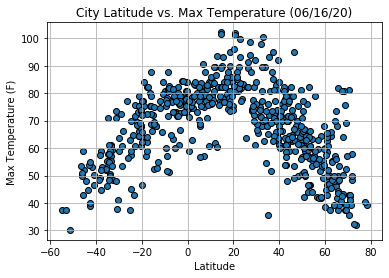

In [119]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Max Temperature (06/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("scatter_plots/temp_lat.png")

plt.show()

This plot is looking at the relationship between latitude and temperature. It shows that as you get closer to the equator, the temperature rises as it forms a bell curve. 

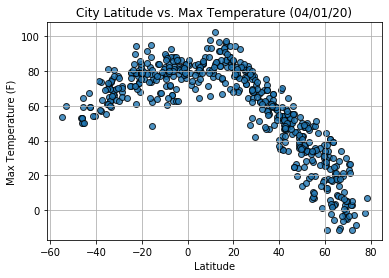

## Latitude vs. Humidity Plot

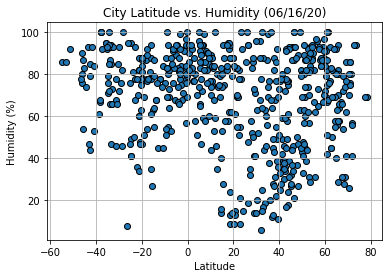

In [118]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Humidity (06/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("scatter_plots/hum_lat.png")

plt.show()

This plot is looking at the relationship between latitude and humidity. It shows that humidity is pretty consistent across cities that are right on the equator, but the trends between the negativeband positive latitudes seem to have somewhat different trends and when the positive side hits 40 degress, there are a large number of cities around 40% humidity where -40 degrees are scattered. 

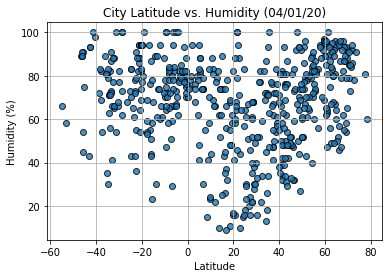

## Latitude vs. Cloudiness Plot

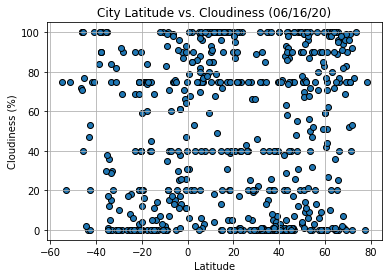

In [117]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Cloudiness (06/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("scatter_plots/cloud_lat.png")

plt.show()

This plot is looking at the relationship between latitude and cloudiness. It shows that there is very little cloudliness approximentally between 10 to 40 degress and -10 to -40 degrees where the cloudiness varies when you reach the equator.

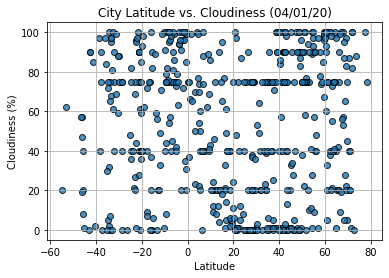

## Latitude vs. Wind Speed Plot

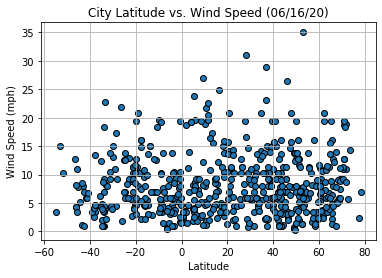

In [116]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", edgecolors="black")

plt.title("City Latitude vs. Wind Speed (06/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("scatter_plots/wind_lat.png")

plt.show()

This plot is looking at the relationship between latitude and wind speed. It shows that most windspeeds are under 20 mph, where the bulk of winds are under 10 mph. This stays consistent no matter which lattitude your are at.

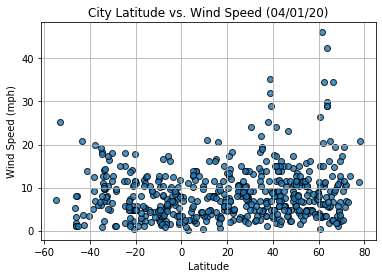

## Linear Regression

In [37]:
# OPTIONAL: Create a function to create Linear Regression plots



In [58]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = weather_df.loc[weather_df["Lat"] >= 0]
south_hem = weather_df.loc[weather_df["Lat"] < 0]



In [89]:
north_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.67,-52.73,69.80,37,40,20.80,CA,1592344542
1,Tabas,33.60,56.92,89.60,19,0,4.70,IR,1592344543
2,Kahului,20.89,-156.47,82.40,61,40,20.80,US,1592344543
3,Khatanga,71.97,102.50,48.51,57,92,10.89,RU,1592344487
4,Bethel,41.37,-73.41,75.99,49,1,9.17,US,1592344543
...,...,...,...,...,...,...,...,...,...
570,Coro,11.40,-69.67,83.80,68,18,19.55,VE,1592344539
572,Sonoita,31.85,-112.83,98.01,6,1,8.99,MX,1592344680
573,Port Blair,11.67,92.75,80.76,84,100,20.42,IN,1592344453
574,Kaina,12.64,8.59,93.61,35,49,16.37,NG,1592344681


In [90]:
south_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,Port Alfred,-33.59,26.89,57.00,85,15,4.00,ZA,1592344544
9,Atuona,-9.80,-139.03,80.67,76,2,19.55,PF,1592344544
12,Mataura,-46.19,168.86,50.13,76,100,4.25,NZ,1592344470
13,East London,-33.02,27.91,59.14,73,30,8.14,ZA,1592344545
14,Cape Town,-33.93,18.42,50.00,93,0,3.36,ZA,1592344256
...,...,...,...,...,...,...,...,...,...
557,Nacala,-14.54,40.67,68.76,79,11,13.65,MZ,1592344677
564,Touros,-5.20,-35.46,77.00,94,75,5.82,BR,1592344678
565,Manyana,-23.40,21.72,42.93,50,0,5.84,BW,1592344679
568,Porto Nacional,-10.71,-48.42,84.20,45,0,6.93,BR,1592344679


In [145]:
len(north_hem)

392

In [146]:
len(south_hem)

184

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6955954326324764


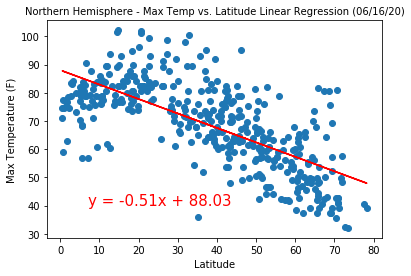

In [138]:
x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"]

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (7, 40), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (06/16/20)", fontsize=10)

print("The r-squared is: " + str(rvalue))

plt.savefig("linear_regression_plots/north_temp_lat")

plt.show()


The r-squared is: 0.8271188905041935


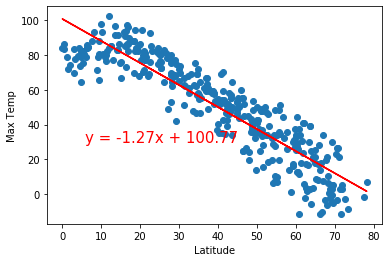

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7546587044741334


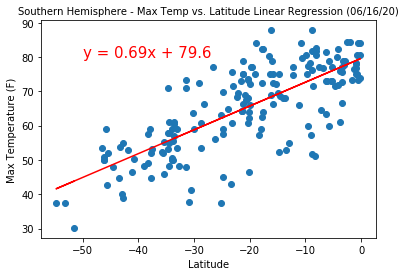

In [139]:
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (06/16/20)", fontsize=10)

print("The r-squared is: " + str(rvalue))

plt.savefig("linear_regression_plots/south_temp_lat")

plt.show()

Both of these graphs indicate that the temperature rises as you get closer to the equator and also the temperatures lower as you get farther from the equator. Our Southern graph has a high correlation while the North is right on the esge of being a high correlation. Also looking at the points, we can alos visually see similar trends from both graphs. 

The r-squared is: 0.39936284758885965


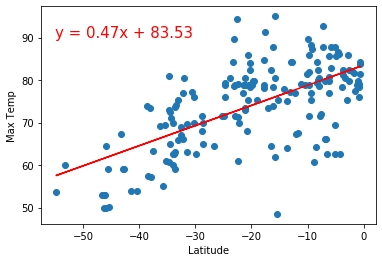

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.05195325139761066


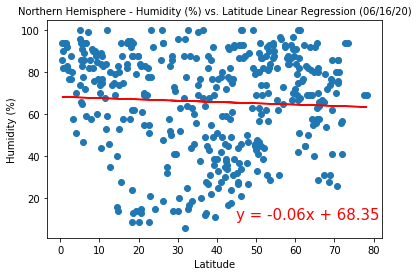

In [140]:
x_values = north_hem["Lat"]
y_values = north_hem["Humidity"]

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45, 10), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (06/16/20)", fontsize=10)

print("The r-squared is: " + str(rvalue))

plt.savefig("linear_regression_plots/north_hum_lat")

plt.show()

The r-squared is: 0.10829462153873139


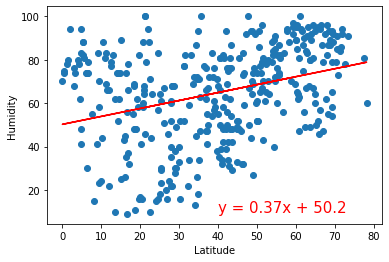

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008153436633323456


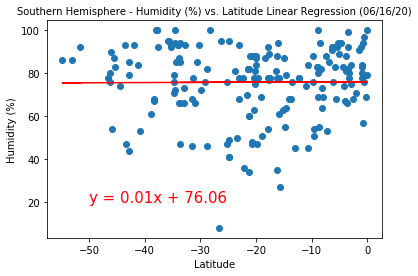

In [141]:
x_values = south_hem["Lat"]
y_values = south_hem["Humidity"]

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (06/16/20)", fontsize=10)

print("The r-squared is: " + str(rvalue))

plt.savefig("linear_regression_plots/south_hum_lat")

plt.show()

Starting off with the correlation, it is very low for both graphs which shows that humidy and latitude have little correlation with each other. Our Northern graph has a very slight curve where the farther you get from the equator, the lower the humidity gets, but not enough to show a correlation. Our Southern graph is almost a flat line, so nothing too much for us to go forard with other than knowing what variable we do not need to concentrate on in the future.

The r-squared is: 0.0008996079328825663


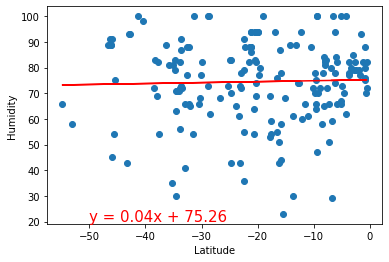

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.047984424898626345


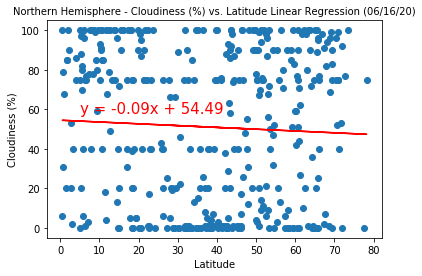

In [143]:
x_values = north_hem["Lat"]
y_values = north_hem["Cloudiness"]

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5, 58), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (06/16/20)", fontsize= 10)

print("The r-squared is: " + str(rvalue))

plt.savefig("linear_regression_plots/north_cloud_lat")

plt.show()

The r-squared is: 0.05768812657005063


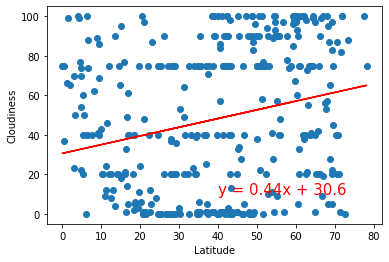

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.05780975670849617


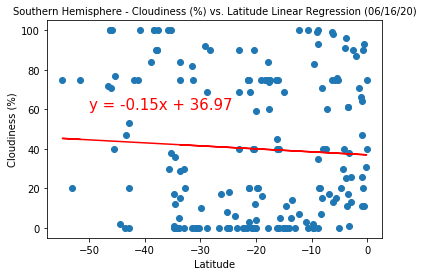

In [142]:
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"]

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 60), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (06/16/20)", fontsize=10)

print("The r-squared is: " + str(rvalue))

plt.savefig("linear_regression_plots/south_cloud_lat")

plt.show()

Looking at the correlation values, it can be seen that both charts have very little correlation between cloudliness and latitude. It is interesting that the slight curve on both graphs do not create a bell curve. As you go positive in latitude, there is a slight decrease in cloudliness. As you go negative in latitude, there is a slight increase in cloudliness. If we had higher correlations, this would have been very interesting.  

The r-squared is: 0.0684912094859049


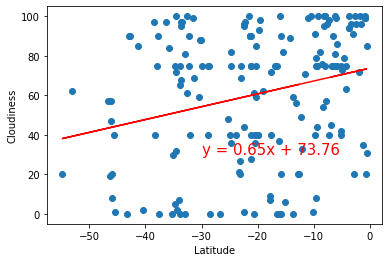

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.006488975675180081


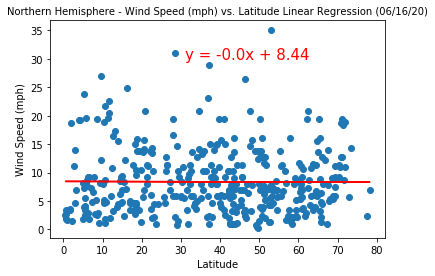

In [127]:
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (31, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (06/16/20)", fontsize=10)

print("The r-squared is: " + str(rvalue))

plt.savefig("linear_regression_plots/north_wind_lat")

plt.show()

The r-squared is: 0.023371104533850804


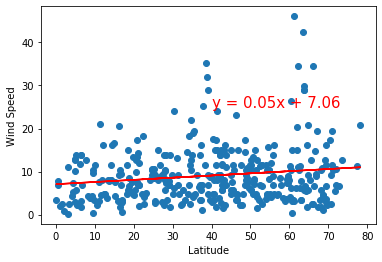

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.026314761618721233


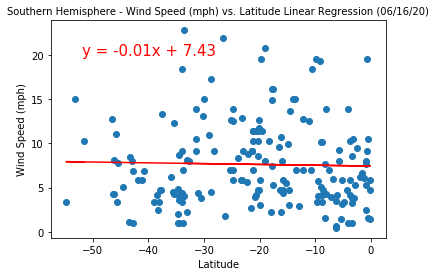

In [126]:
x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]

(slope,intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-52, 20), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (06/16/20)", fontsize=10)

print("The r-squared is: " + str(rvalue))

plt.savefig("linear_regression_plots/south_wind_lat")

plt.show()

Looking at the correlation values, it can be seen that both charts have very little correlation between wind speed and latitude. The Northern chart pretty much has a straight line, but it is clear from the point that the wind speed is consistently just under 10 mph at any positive latitude. The same could be siad for the Southern points, but there are not as many points together to make out the staright line. 

The r-squared is: 0.03381889207758188


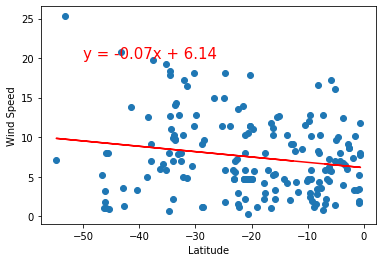